In [9]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split
# Load the Excel file
file_path = "C:/Users/namra/Documents/HummaAI/archive/train.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

def clean_text(text):
    if isinstance(text, str):
    # Replace common mis-encoded characters
        return (text.replace("â€™", "a")
                    .replace("Â", "")
                    .replace("\u2019", "'")
                    .replace("â€œ", '"')
                    .replace("â€", '"')
                    .replace("â€“", "")
                    .replace("â€”", ""))
    else:
        return ""
df['Context'] = df['Context'].apply(clean_text)
df['Response'] = df['Response'].apply(clean_text)

train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
def save_to_jsonl(dataframe, output_file):
    with open(output_file, 'w', encoding='utf-8') as f:
        for _, row in dataframe.iterrows():
            entry = {
                        "prompt": (

                            "Below is a Instruction that holds conversation which describes discussion between two people."
                            "Write a more empathetically appropriate response.\n\n"
                            "### Instruction:\n{context}\n\n"
                           
                        ).format(
                            #instruction="Provide troubleshooting steps for resolving issues.",
                            context=row['Context']
                        ),
                        "completion": row['Response']
                    }
            f.write(json.dumps(entry, ensure_ascii=False) + '\n')

# Save the datasets to JSONL files
save_to_jsonl(train_df, 'C:/Users/namra/Documents/HummaAI/train_js_2.jsonl')
save_to_jsonl(val_df, 'C:/Users/namra/Documents/HummaAI/val_js_2.jsonl')
save_to_jsonl(test_df, 'C:/Users/namra/Documents/HummaAI/test_js_2.jsonl')
# Prepare JSONL data
# jsonl_data = []
# for _, row in df.iterrows():
#     prompt = row['Context']
#     response = row['Response']
#     jsonl_data.append({"prompt": prompt, "response": response})

# # Save to JSONL file
# output_file = 'C:/Users/namra/Documents/HummaAI/prompts_responses.jsonl'
# with open(output_file, 'w', encoding='utf-8') as f:
#     for entry in jsonl_data:
#         f.write(json.dumps(entry, ensure_ascii=False) + '\n')

print(f"Data has been successfully saved to train,test,val files")


Data has been successfully saved to train,test,val files


In [11]:
pip install transformers

     ---------------------------------------- 0.0/44.1 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.1 kB ? eta -:--:--
     -------------------------- ----------- 30.7/44.1 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 44.1/44.1 kB 308.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.0 MB 7.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/10.0 MB 8.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/10.0 MB 5.9 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/10.0 MB 6.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/10.0 MB 6.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/10.0 MB 5.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/10.0 MB 6.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/10.0 MB 6.5 MB/s eta 0:00:02
   ------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install textblob


  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.5 MB 2.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 4.6 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 5.7 MB/s eta 0:00:01
   --------------------------------- ------ 1.3/1.5 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 7.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

# Initialize sentiment and emotion analysis tools
sentiment_analyzer = SentimentIntensityAnalyzer()
emotion_analyzer = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base",device=0)

# Function to calculate empathy score
def empathy_score(response):
    # 1. Sentiment Analysis (VADER)
    sentiment = sentiment_analyzer.polarity_scores(response)
    sentiment_score = sentiment['pos'] - sentiment['neg']  # positive sentiment suggests empathy
    
    # 2. Emotion Analysis
    emotions = emotion_analyzer(response,truncation=True)
    print(emotions)
    empathy_emotion_score = 0
    for emotion in emotions:
        if emotion['label'] in ["compassion", "caring", "empathy"]:
            empathy_emotion_score += emotion['score']
            print(emotion)
    
    # 3. Key empathy phrases
    empathy_phrases = ["I understand", "I'm sorry", "That must be hard", "I can imagine"]
    phrase_score = sum([1 for phrase in empathy_phrases if phrase.lower() in response.lower()])
    
    # Final Empathy Score (combining all metrics)
    total_score = (sentiment_score * 0.4) + (empathy_emotion_score * 0.4) + (phrase_score * 0.2)
    return total_score

# Test the function
chresponse1 = "Losing your job can be challenging, especially if you worked long hours and enjoyed the role. It may be helpful to assess your skills and update your resume to reflect your professional strengths. You could also explore new opportunities in your industry or consider learning additional skills to improve your employability. Networking through online platforms or professional events could open up new connections and career paths. While the loss of your social network at work can be difficult, joining community groups, professional organizations, or online forums may provide avenues to build new relationships. Taking practical steps toward re-employment and community engagement could help address your current challenges."
mhresponse1 = "I’m really sorry to hear about your job loss—it’s a tough experience, especially when you were so dedicated and enjoyed the work. It’s completely natural to feel sad and even hopeless right now, but it’s important to remember that this is just a chapter, not the entire story. Take some time to grieve and process your feelings, but also try to focus on self-care. Reflect on your strengths and the skills you’ve developed from your job; they’re assets you can bring to new opportunities. Consider reaching out to trusted friends or mentors for support, and maybe begin exploring options like updating your resume, networking, or even learning a new skill to broaden your prospects. Sometimes setbacks pave the way for something even better—it’s okay to take it one step at a time."
chhresponse2 = "Losing your primary social network can be challenging. To rebuild connections, consider joining professional networking platforms, attending industry events, or participating in community activities. Online forums, local groups, or volunteer opportunities can also help you meet new people and expand your network. Establishing a new support system may take time but is achievable with consistent effort."
mhresponse2 = " I'm so sorry to hear that you're feeling so isolated right now. Losing a job can feel even harder when it also affects your social connections. It’s okay to feel overwhelmed, but this could also be an opportunity to start rebuilding connections in new ways. Consider joining local groups or online communities related to your interests or industry; you might find people who understand what you’re going through and can offer support or advice. Volunteering is another great way to meet people while contributing to something meaningful. Even small steps, like attending networking events or reaching out on professional platforms like LinkedIn, can help you start creating a new support system. You’re not alone in this, and there are people and resources out there who care and want to help you succeed."
chresponse3 = "I’m glad this conversation has been helpful for you. Taking the first step toward a solution is important, and I hope you continue to find ways to move forward effectively."
mhresponse3 = "You’re very welcome. I’m so glad this conversation has helped you feel a bit more hopeful. Remember, you’re not alone, and taking even small steps forward is a sign of your resilience. Keep going—you’re stronger than you think."
score1 = empathy_score(chresponse1)
score2 = empathy_score(mhresponse1)
score3 = empathy_score(chhresponse2)
score4 = empathy_score(mhresponse2)
score5 = empathy_score(chresponse3)
score6 = empathy_score(mhresponse3)
print("Empathy Score - chatgpt1: ", score1)
print("Empathy Score - mhresponse1: ", score2)
print("Empathy Score - chatgpt2: ", score3)
print("Empathy Score - mhresponse2: ", score4)
print("Empathy Score - chatgpt3: ", score5)
print("Empathy Score - mhresponse3: ", score6)

[{'label': 'joy', 'score': 0.5322604775428772}]
[{'label': 'sadness', 'score': 0.9712069630622864}]
[{'label': 'neutral', 'score': 0.8004661202430725}]
[{'label': 'fear', 'score': 0.5323610305786133}]
[{'label': 'joy', 'score': 0.9774426221847534}]
[{'label': 'joy', 'score': 0.9618914127349854}]
Empathy Score - chatgpt1:  0.049600000000000005
Empathy Score - mhresponse1:  0.07440000000000001
Empathy Score - chatgpt2:  0.0616
Empathy Score - mhresponse2:  0.11960000000000003
Empathy Score - chatgpt3:  0.15800000000000003
Empathy Score - mhresponse3:  0.12240000000000001


In [2]:
pip install tf-keras

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 2.0 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/1.7 MB 3.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.7 MB 4.2 MB/s eta 0:00:01
   -------------------- ------------------- 0.9/1.7 MB 5.6 MB/s eta 0:00:01
   ---------------------------- ----------- 1.2/1.7 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.3 MB 16.5 MB/s eta 0:00:24
   ---------------------------------------- 1.1/390.3 MB 16.8 MB/s eta 0:00:24
   ---------------------------------------- 1.6/390.3 MB 14.3 MB/s eta 0:00:28
   ---------------------------------------- 2.1/390.3 MB 13.5 MB/s eta 0:00:29
   --------

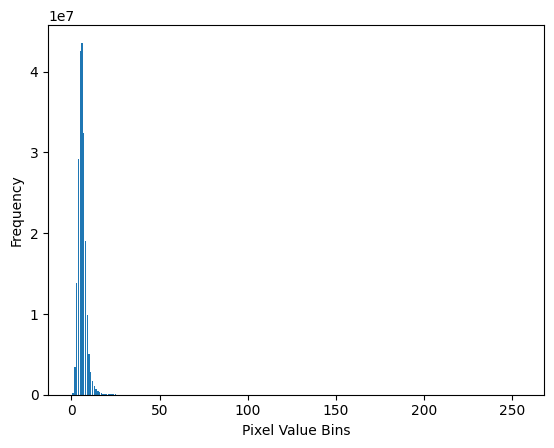

In [3]:
import matplotlib.pyplot as plt
hist_counts = [829,212268,3432997,13791023,29155135,42511474,43583183,32374614,19072935,9831270,5016296,2753809,1639629,1026924,661970,438624,296035,204999,147074,107648,81931,63653,50801,41496,34843,29720,25335,22459,19750,17690,15754,14267,12887,11628,10854,9916,9283,8484,8015,7401,6825,6321,5906,5487,5144,4826,4474,4291,3936,3815,3522,3297,3098,2848,2800,2682,2466,2391,2227,2070,2033,1866,1742,1696,1598,1445,1404,1430,1347,1249,1242,1168,1073,1047,1005,936,905,897,834,768,744,734,731,685,633,605,632,579,533,548,483,476,449,422,431,432,426,384,376,327,352,328,339,303,308,297,275,248,268,251,265,194,229,238,230,193,179,186,185,177,168,180,169,145,150,163,132,124,131,140,129,110,137,120,123,108,110,117,101,89,84,94,87,84,78,77,81,76,68,81,67,72,61,62,52,65,51,61,59,64,48,64,51,55,56,49,43,53,44,48,42,44,39,33,45,42,44,45,42,39,39,29,35,24,27,34,42,43,41,35,18,41,34,31,31,22,23,28,26,20,19,18,29,19,31,24,22,36,20,28,28,22,21,21,21,18,23,19,13,24,11,18,10,17,19,11,13,15,12,15,16,14,16,14,15,14,4,11,10,10,13,15,16,17,5,6,13,10,14,8,16,16,9,10,6,600]
plt.bar(range(len(hist_counts)), hist_counts)
plt.xlabel("Pixel Value Bins")
plt.ylabel("Frequency")
plt.show()
